# Analysis of the news headlines

## 1) Importing and cleaning of data

Let's import the necessary libraries and read the csv file:

In [1]:
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("News_headlines_data.csv")

Let's see how many columns are there and see how many unique values each column has

In [3]:
Data.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')

In [4]:
Data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


It is clear that the `'time_created'`, `'date_created'` and `'title'` columns of the news will have many unique values, so we will focus our attention on other columns:

In [5]:
print("Number of unique values for 'up_votes' column: ", len(Data['up_votes'].unique()))
print("Number of unique values for 'down_votes' column: ", len(Data['down_votes'].unique()))
print("Number of unique values for 'over_18' column: ", len(Data['over_18'].unique()))
print("Number of unique values for 'category' column: ", len(Data['category'].unique()))

Number of unique values for 'up_votes' column:  5782
Number of unique values for 'down_votes' column:  1
Number of unique values for 'over_18' column:  2
Number of unique values for 'category' column:  1


From this we can see that `'down_votes'` and `'category'` columns have single unique values, so these columns will not give us anything useful and we can just drop them from our data. Also, I think we don't need the `'time_created'` column for our purposes as we already have the `'date_created'` column, so we will just drop that column too (seems like the time has been counted from some unknown reference moment in history, maybe from the beginning of the Gregorian calendar. Anyways, we don't really need the exact time when the news have been created, and we will use only the date created)

In [6]:
Data = Data.drop(['time_created', 'down_votes', 'category'], axis=1)

Let's convert the `'date_created'` into a `'datetime'` object which will make it easy for our further analysis:

In [7]:
Data['date_created'] = pd.to_datetime(Data.date_created, format='%Y-%m-%d')
#Data.iloc[18,4]

Let's see if our data contains any empty or null values:

In [8]:
Data.isnull().any()

date_created    False
up_votes        False
title           False
over_18         False
author          False
dtype: bool

So we see that all of our data is non-empty and we don't need to drop any null values.

## 2) Analysis 

In [9]:
number_of_articles = len(Data)
number_of_articles

509236

### Number of articles published every year:

In [10]:
Data.groupby(Data.date_created.dt.year)['title'].count()

date_created
2008    22505
2009    25115
2010    23313
2011    38886
2012    42643
2013    88231
2014    92030
2015    94621
2016    81892
Name: title, dtype: int64

This shows the number of articles published every year. It seems like the number of articles has suddenly jumped in 2013 and slightly dropped down in 2016. We can visualize this by plotting a graph:

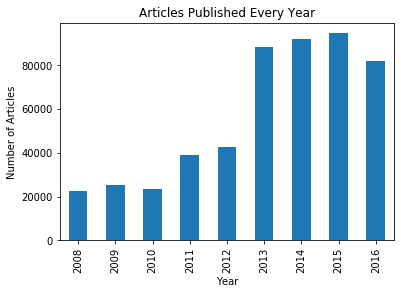

In [11]:
ax = Data.groupby(Data.date_created.dt.year)['title'].count().plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")
plt.show()

We can also see the number of articles published every month:

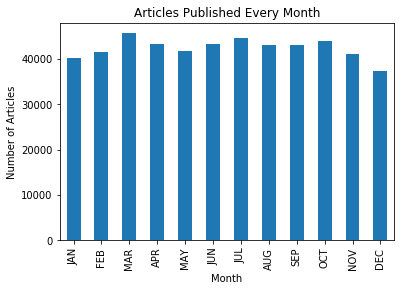

In [12]:
ax = Data.groupby(Data.date_created.dt.month)['title'].count().plot(kind='bar')
months = ['JAN',  'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month")
plt.show()

Looks like the number of articles are almost evenly distributed over the months. 

We can also look at the articles published by the day of the week: average number and the total number

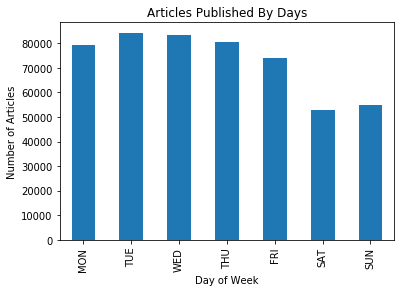

In [13]:
ax = Data.groupby(Data.date_created.dt.weekday)['title'].count().plot(kind='bar')
days_of_week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Number of Articles', title="Articles Published By Days")
plt.show()

This shows that the number of articles published during the weekdays are higher than
during the weekends.

We can also look at the average number of articles published per day of the week:

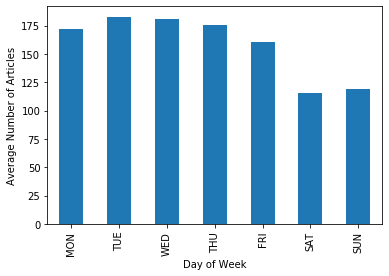

In [14]:
day_of_week = Data.groupby(Data['date_created'].dt.dayofweek).date_created
ax = (day_of_week.count()/day_of_week.unique().apply(len)).plot(kind='bar')
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Average Number of Articles')
plt.show()

We can see that the highest number of articles are published on Tuesdays with over 80K
articles in total and over 175 articles on average.

Let's compare the number of articles published on weekends to the ones published during the
weekdays:

In [15]:
def is_weekend(row):
    ''' Returns True if weekend else False '''
    return (row.dayofweek == 5 or row.dayofweek == 6)

Data['weekend'] = Data['date_created'].apply(is_weekend) # adds a new column with value 1 or 0 specifying weekend

In [16]:
print('Total articles published on weekend =', Data[Data['weekend']==1]['weekend'].count())
print('Total articles published on weekdays =', Data[Data['weekend']==0]['weekend'].count())

print('Percentage of articles published on weekend = %', round(Data[Data['weekend']==1]['weekend'].count()/number_of_articles*100, 2))
print('Percentage of articles published on weekdays = %', round(Data[Data['weekend']==0]['weekend'].count()/number_of_articles*100, 2))

Total articles published on weekend = 107871
Total articles published on weekdays = 401365
Percentage of articles published on weekend = % 21.18
Percentage of articles published on weekdays = % 78.82


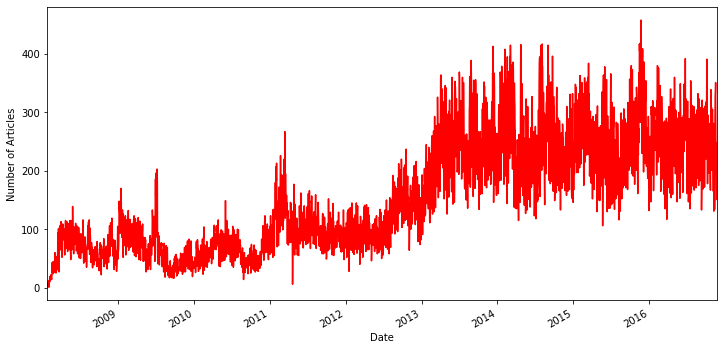

In [17]:
ax = Data['date_created'].value_counts().plot(color='red', figsize=(12,6))
ax.set(xlabel='Date', ylabel='Number of Articles')
plt.show()

This plot now shows the number of articles published every day